In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Regression

- 종속변수: cooler_eff

- 독립변수: 각 변수의 중앙값

In [15]:
data = pd.read_csv('data_median.csv')
data.head()

,CE,CP,EPS1,FS1,FS2,PS1,PS2,PS3,PS4,PS5,...,TS1,TS2,TS3,TS4,VS1,cooler_eff,valve_perc,pump_leak,accu_prs,stable
0,40.6755,1.9240,2479.8,7.836,10.327,156.25,129.365,2.297,0.0,9.844,...,35.5720,40.9630,38.4960,31.576,0.5770,3,100,0,130,1
1,25.3855,1.2340,2470.0,7.853,10.403,156.06,129.385,2.273,0.0,9.632,...,36.7675,41.5180,38.9845,34.553,0.5595,3,100,0,130,1
2,22.1040,1.1095,2457.4,7.847,10.367,155.72,129.325,2.273,0.0,9.528,...,38.0235,42.4235,39.6270,35.635,0.5620,3,100,0,130,1
3,20.4805,1.0660,2448.0,7.843,10.302,155.56,128.865,2.242,0.0,9.436,...,39.0550,43.3650,40.3420,36.635,0.5550,3,100,0,130,1
4,19.7985,1.0725,2440.6,7.831,10.236,155.34,129.000,2.219,0.0,9.358,...,39.9670,44.3355,41.3400,37.439,0.5760,3,100,0,130,1


In [16]:
data.shape

(2205, 22)

In [17]:
data.columns

Index(['CE', 'CP', 'EPS1', 'FS1', 'FS2', 'PS1', 'PS2', 'PS3', 'PS4', 'PS5',
       'PS6', 'SE', 'TS1', 'TS2', 'TS3', 'TS4', 'VS1', 'cooler_eff',
       'valve_perc', 'pump_leak', 'accu_prs', 'stable'],
      dtype='object')

In [18]:
data = data.drop(['valve_perc', 'pump_leak', 'accu_prs', 'stable'], axis=1)

## 결측값

In [19]:
data.isnull().sum()

CE            0
CP            0
EPS1          0
FS1           0
FS2           0
PS1           0
PS2           0
PS3           0
PS4           0
PS5           0
PS6           0
SE            0
TS1           0
TS2           0
TS3           0
TS4           0
VS1           0
cooler_eff    0
dtype: int64

## 이상치 검출

<AxesSubplot:>

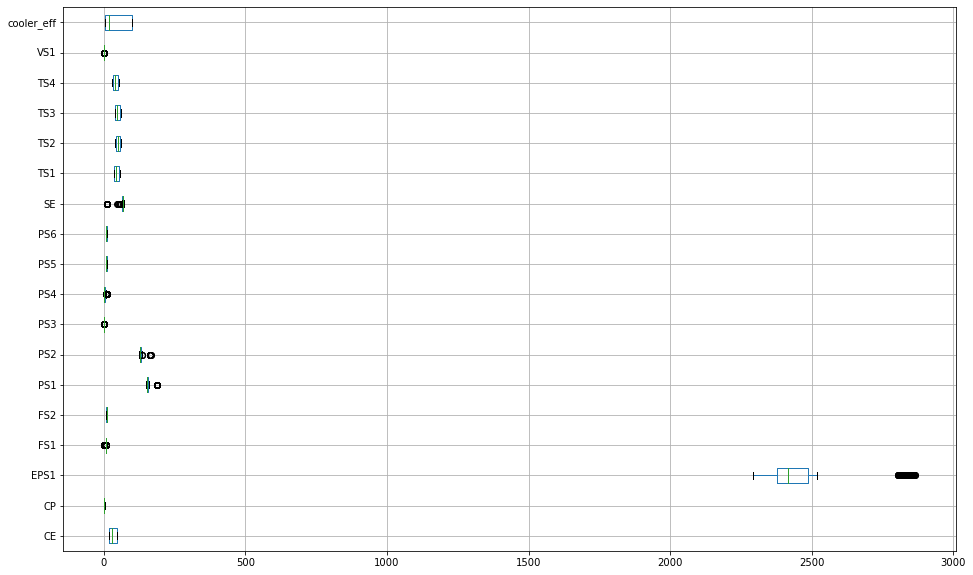

In [20]:
plt.figure(figsize=(16,10))
data.boxplot(vert=0)

In [21]:
def outlier_iqr(data):
    q1, q3 = np.percentile(data,[25,75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr*1.5)
    upper_bound = q3 + (iqr*1.5)
    
    return np.where((data > upper_bound) | (data < lower_bound))

In [23]:
for i in range(len(data.columns)):
    print(outlier_iqr(data.iloc[:,i]))
    print(len(outlier_iqr(data.iloc[:,i])[0]))

(array([], dtype=int64),)
0
(array([], dtype=int64),)
0
(array([211, 247, 343, 345, 346, 347, 348, 349, 351, 352, 353, 354, 355,
       356, 357, 358, 359, 360, 361, 362, 363, 364, 366, 367, 368, 369,
       370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 381, 382, 384,
       385, 386, 388, 390, 391, 392, 394, 395, 398, 399, 400, 401, 402,
       404, 405, 406, 407, 408, 409, 410, 411, 412, 414, 415, 416, 418,
       421, 422, 423, 424, 463, 469, 476, 477, 478, 479, 480, 481, 482,
       483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 496,
       497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509,
       510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522,
       523, 524, 525, 526, 528, 530, 533, 534, 535, 536, 537, 538, 539,
       540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552,
       553, 554, 555, 556, 557, 560, 565, 571, 573, 574, 577, 582, 583,
       587, 591, 594, 596, 609, 610, 611, 612, 613, 614, 615, 616, 617,
       

In [24]:
#EPS1 이상치 제거
out_EPS1 = outlier_iqr(data['EPS1'])[0]

data = data.drop(index = out_EPS1)
data = data.reset_index(drop = True)

## 분포 확인

In [25]:
data.head()

,CE,CP,EPS1,FS1,FS2,PS1,PS2,PS3,PS4,PS5,PS6,SE,TS1,TS2,TS3,TS4,VS1,cooler_eff
0,40.6755,1.9240,2479.8,7.836,10.327,156.25,129.365,2.297,0.0,9.844,9.733,68.5145,35.5720,40.9630,38.4960,31.576,0.5770,3
1,25.3855,1.2340,2470.0,7.853,10.403,156.06,129.385,2.273,0.0,9.632,9.526,68.5360,36.7675,41.5180,38.9845,34.553,0.5595,3
2,22.1040,1.1095,2457.4,7.847,10.367,155.72,129.325,2.273,0.0,9.528,9.425,68.8530,38.0235,42.4235,39.6270,35.635,0.5620,3
3,20.4805,1.0660,2448.0,7.843,10.302,155.56,128.865,2.242,0.0,9.436,9.335,69.0060,39.0550,43.3650,40.3420,36.635,0.5550,3
4,19.7985,1.0725,2440.6,7.831,10.236,155.34,129.000,2.219,0.0,9.358,9.260,69.0130,39.9670,44.3355,41.3400,37.439,0.5760,3


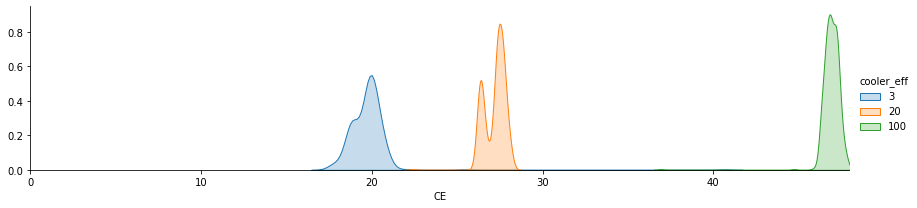

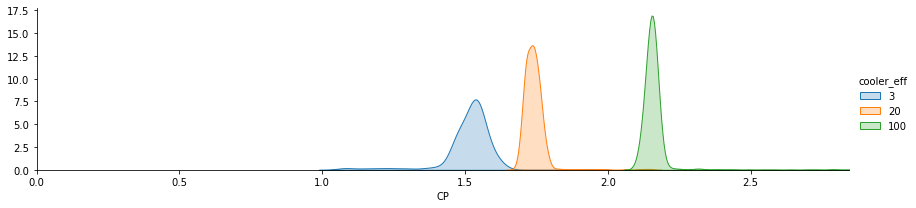

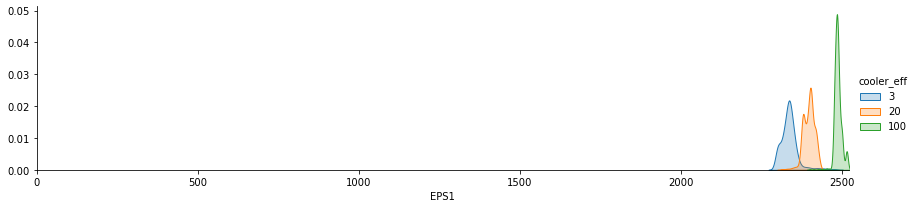

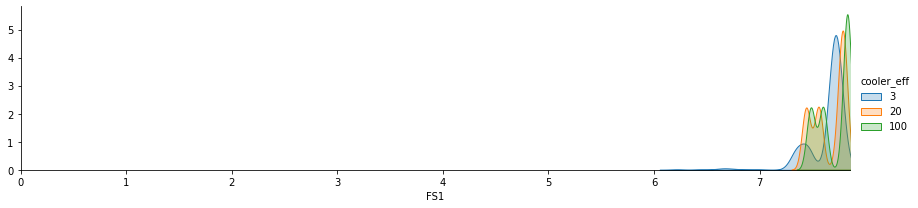

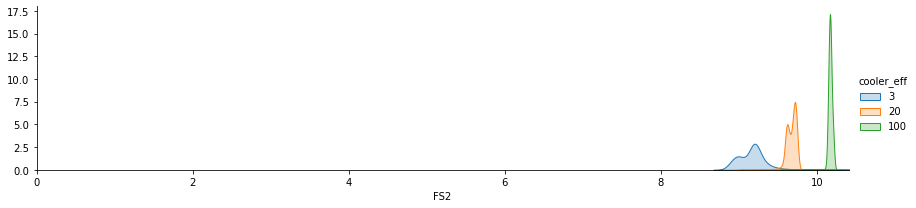

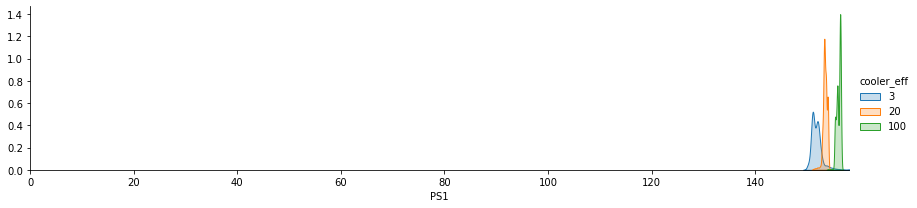

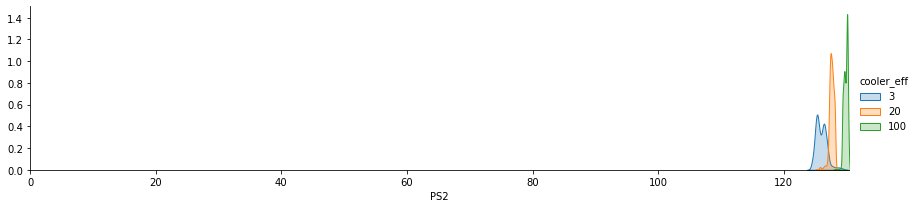

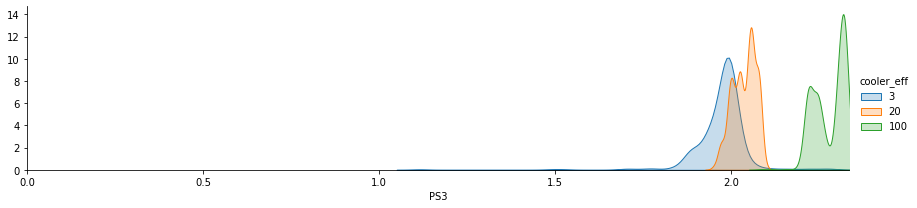

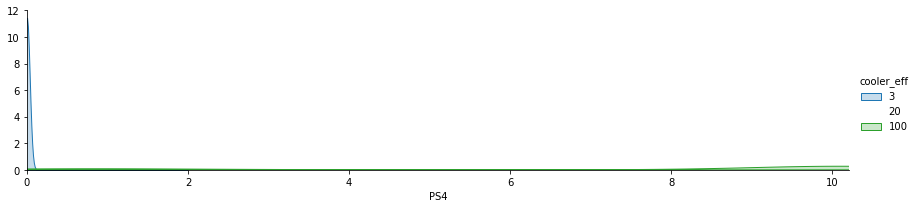

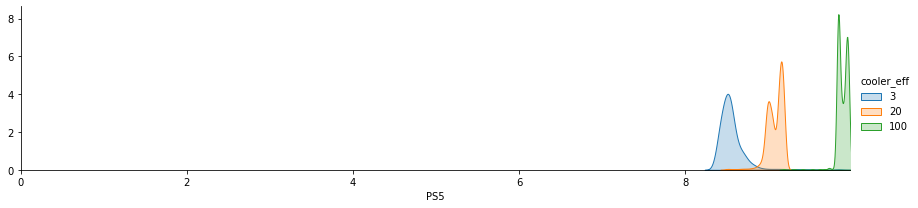

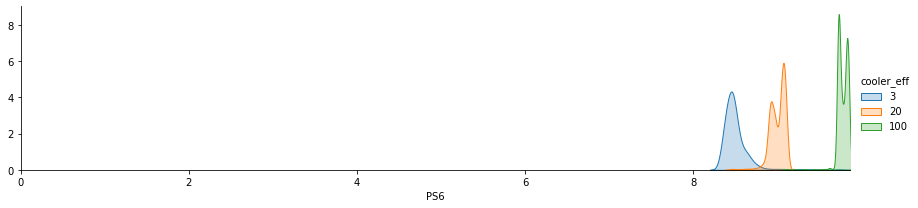

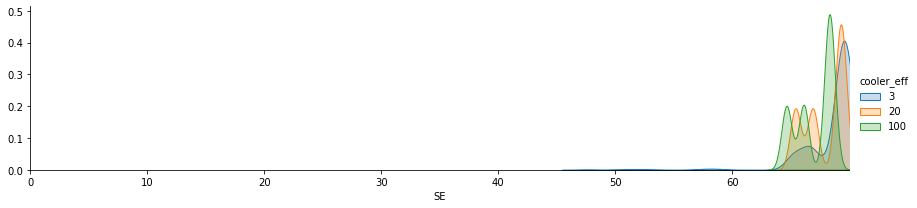

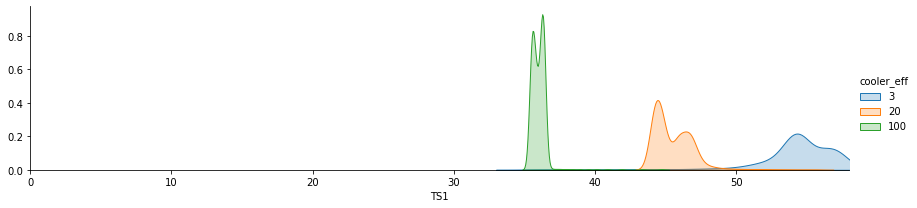

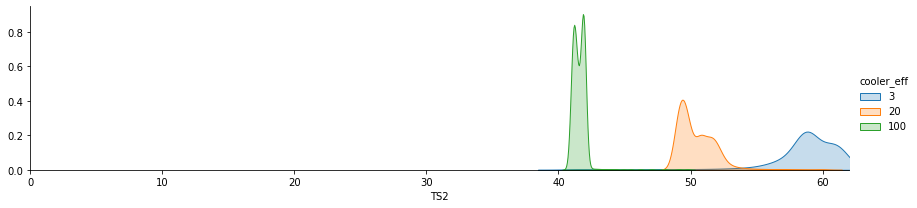

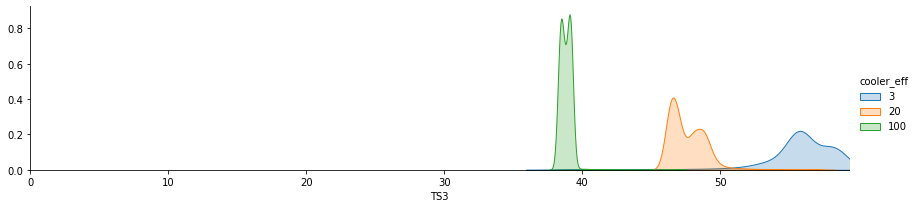

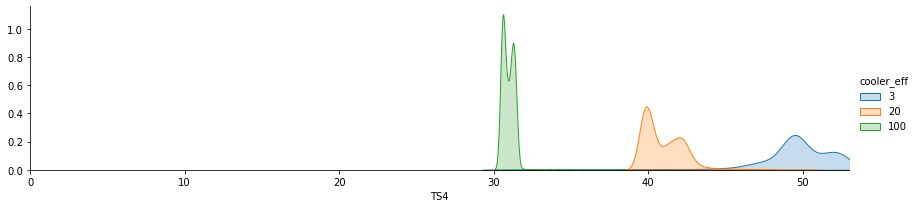

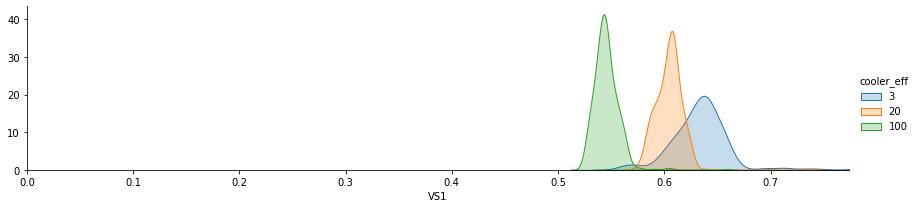

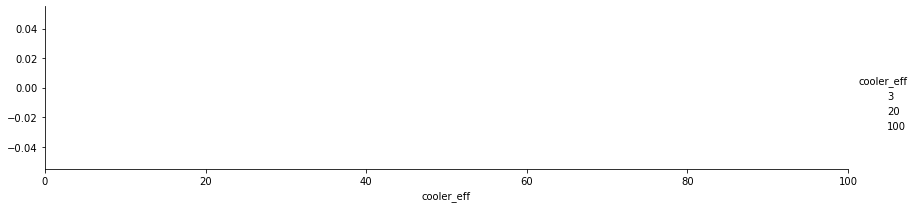

In [26]:
for i in range(len(data.columns)):    
    facet = sns.FacetGrid(data, hue="cooler_eff",aspect=4)
    facet.map(sns.kdeplot,data.columns[i],shade= True)
    facet.set(xlim=(0, data.iloc[:,i].max()))
    facet.add_legend()
    plt.show()

## 상관분석

<AxesSubplot:>

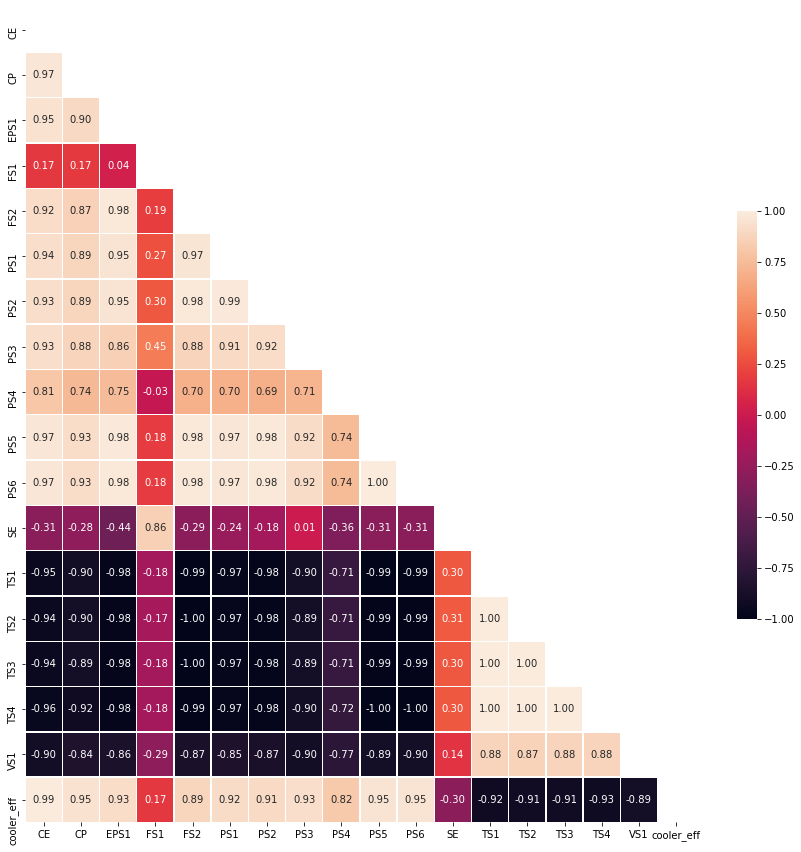

In [27]:
plt.figure(figsize = (15,15))

#삼각형 마스크
mask = np.zeros_like(data.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#히트맵
sns.heatmap(data.corr(),
            annot=True, #실제갑 화면에 나타내기
            fmt='.2f',
            #cmap='RdYlBu_r', #Red, Yellow, Blue 색상으로 표시
           mask=mask,
           linewidths=.5,
           cbar_kws={'shrink':.5}, #컬러바 크기 절반으로 줄이기
            vmin = -1, vmax=1
           )


#plt.savefig('kaggle_corr.png',dpi=600, bbox_inches='tight')

In [28]:
x = data.drop('cooler_eff',axis=1)

## 정규화(븐포 범위 0~1)

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler_minmax = MinMaxScaler()
x_minmax = scaler_minmax.fit(x).transform(x)

In [30]:
x_minmax = pd.DataFrame(x_minmax)
x_minmax.columns = x.columns
x_minmax.head()

,CE,CP,EPS1,FS1,FS2,PS1,PS2,PS3,PS4,PS5,PS6,SE,TS1,TS2,TS3,TS4,VS1
0,0.761217,0.482836,0.823738,0.989580,0.950456,0.766917,0.828981,0.968007,0.0,0.917082,0.919555,0.934668,0.008654,0.005815,0.014251,0.052403,0.222880
1,0.258984,0.094541,0.780337,1.000000,1.000000,0.743108,0.832350,0.948318,0.0,0.784913,0.784173,0.935630,0.061575,0.032051,0.037380,0.184053,0.153846
2,0.151196,0.024479,0.724535,0.996322,0.976532,0.700501,0.822241,0.948318,0.0,0.720075,0.718116,0.949815,0.117173,0.074856,0.067800,0.231902,0.163708
3,0.097868,0.000000,0.682905,0.993871,0.934159,0.680451,0.744735,0.922888,0.0,0.662718,0.659254,0.956662,0.162834,0.119363,0.101652,0.276124,0.136095
4,0.075466,0.003658,0.650133,0.986515,0.891134,0.652882,0.767481,0.904020,0.0,0.614090,0.610203,0.956975,0.203205,0.165241,0.148904,0.311679,0.218935


## split data

In [31]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_minmax, data['cooler_eff'], test_size=0.3, random_state=42)

In [32]:
x_train

,CE,CP,EPS1,FS1,FS2,PS1,PS2,PS3,PS4,PS5,PS6,SE,TS1,TS2,TS3,TS4,VS1
1249,0.961536,0.700056,0.814880,0.986515,0.807040,0.730576,0.872789,0.968007,0.072891,0.938279,0.938522,0.920439,0.049379,0.063534,0.068084,0.033344,0.149901
1556,0.992330,0.625211,0.805137,0.985290,0.844850,0.779449,0.906487,0.986874,0.985794,0.911471,0.910399,0.936100,0.038578,0.049021,0.042754,0.035378,0.104536
1617,0.954572,0.601294,0.898140,0.774441,0.847458,0.659148,0.829823,0.904020,0.986186,0.910224,0.910399,0.768453,0.045152,0.051692,0.046967,0.046964,0.102564
1567,0.979799,0.617333,0.815766,0.989274,0.847458,0.766917,0.925864,0.974569,0.986382,0.912718,0.912361,0.934758,0.041101,0.050771,0.046825,0.039358,0.094675
1027,0.335041,0.392515,0.486271,0.824395,0.558670,0.433584,0.563606,0.743232,0.000000,0.496259,0.493787,0.870299,0.390186,0.392857,0.384499,0.407465,0.370809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0.323413,0.377040,0.530558,0.743794,0.565189,0.416040,0.559393,0.730927,0.000000,0.496883,0.495749,0.802327,0.386910,0.387775,0.384594,0.411622,0.384615
1294,0.958777,0.612831,0.831709,0.987128,0.833768,0.790727,0.951137,0.993437,0.106300,0.987531,0.988228,0.922877,0.002767,0.010778,0.007859,0.004201,0.153846
860,0.344058,0.380416,0.557130,0.744101,0.540417,0.382206,0.494524,0.717801,0.000000,0.464464,0.461086,0.792147,0.426883,0.428501,0.424459,0.447398,0.339250
1459,0.975397,0.621835,0.975199,0.781183,0.868318,0.696742,0.873631,0.910582,0.996963,0.978803,0.979071,0.749972,0.012727,0.019949,0.016192,0.011232,0.067061


In [33]:
train_minmax = pd.concat([x_train,y_train],axis=1)
train_minmax

,CE,CP,EPS1,FS1,FS2,PS1,PS2,PS3,PS4,PS5,PS6,SE,TS1,TS2,TS3,TS4,VS1,cooler_eff
1249,0.961536,0.700056,0.814880,0.986515,0.807040,0.730576,0.872789,0.968007,0.072891,0.938279,0.938522,0.920439,0.049379,0.063534,0.068084,0.033344,0.149901,100
1556,0.992330,0.625211,0.805137,0.985290,0.844850,0.779449,0.906487,0.986874,0.985794,0.911471,0.910399,0.936100,0.038578,0.049021,0.042754,0.035378,0.104536,100
1617,0.954572,0.601294,0.898140,0.774441,0.847458,0.659148,0.829823,0.904020,0.986186,0.910224,0.910399,0.768453,0.045152,0.051692,0.046967,0.046964,0.102564,100
1567,0.979799,0.617333,0.815766,0.989274,0.847458,0.766917,0.925864,0.974569,0.986382,0.912718,0.912361,0.934758,0.041101,0.050771,0.046825,0.039358,0.094675,100
1027,0.335041,0.392515,0.486271,0.824395,0.558670,0.433584,0.563606,0.743232,0.000000,0.496259,0.493787,0.870299,0.390186,0.392857,0.384499,0.407465,0.370809,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0.323413,0.377040,0.530558,0.743794,0.565189,0.416040,0.559393,0.730927,0.000000,0.496883,0.495749,0.802327,0.386910,0.387775,0.384594,0.411622,0.384615,20
1294,0.958777,0.612831,0.831709,0.987128,0.833768,0.790727,0.951137,0.993437,0.106300,0.987531,0.988228,0.922877,0.002767,0.010778,0.007859,0.004201,0.153846,100
860,0.344058,0.380416,0.557130,0.744101,0.540417,0.382206,0.494524,0.717801,0.000000,0.464464,0.461086,0.792147,0.426883,0.428501,0.424459,0.447398,0.339250,20
1459,0.975397,0.621835,0.975199,0.781183,0.868318,0.696742,0.873631,0.910582,0.996963,0.978803,0.979071,0.749972,0.012727,0.019949,0.016192,0.011232,0.067061,100


## 모델링

### decision tree

In [75]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [76]:
features_names = x_train.columns

In [77]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg,x_train,y_train,scoring='neg_mean_squared_error',cv=10)
RMSE_tree = np.sqrt(-scores)
RMSE_tree.mean()

0.8257188348359861

In [78]:
#featrue importance 
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.title('Decision Tree Regressor Feature Importance')

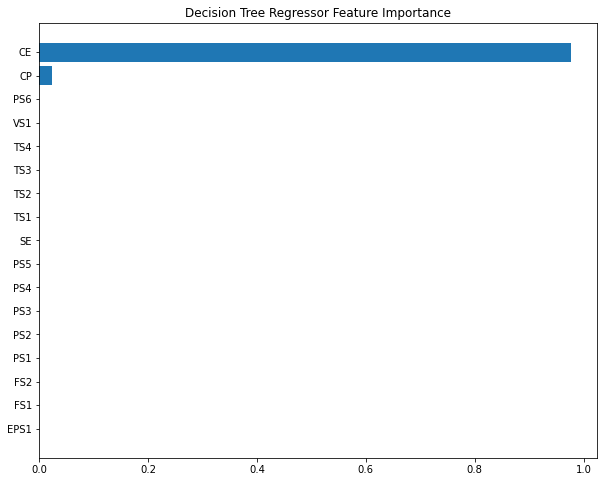

In [79]:
plt.figure(figsize = (10,8))
feature_imp = tree_reg.feature_importances_
f_importances(feature_imp,features_names)

### Random Forest

In [105]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [106]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf,x_train,y_train,scoring='neg_mean_squared_error',cv=10)
RMSE_rf = np.sqrt(-scores)
RMSE_rf.mean()

1.263854699789768

### Extra Tree

In [107]:
from sklearn.ensemble import ExtraTreesRegressor
et = ExtraTreesRegressor(random_state=42)
et.fit(x_train,y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=42, verbose=0, warm_start=False)

In [108]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(et,x_train,y_train,scoring='neg_mean_squared_error',cv=10)
RMSE_et = np.sqrt(-scores)
RMSE_et.mean()

0.9289798013190154

### Gradient Boost

In [89]:
from sklearn.ensemble import GradientBoostingRegressor
grb = GradientBoostingRegressor(random_state=42)
grb.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [91]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(grb,x_train,y_train,scoring='neg_mean_squared_error',cv=10)
RMSE_grb = np.sqrt(-scores)
RMSE_grb.mean()

0.9192546096881259

In [92]:
#featrue importance 
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.title('Gradient Boosting Regressor Feature Importance')

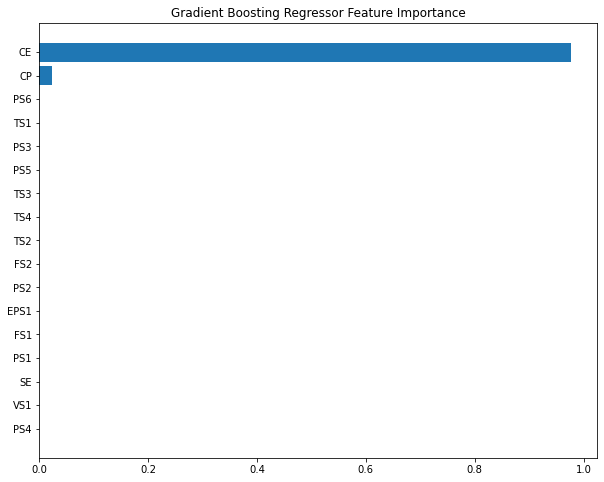

In [93]:
plt.figure(figsize = (10,8))
feature_imp = grb.feature_importances_
f_importances(feature_imp,features_names)

### AdaBoost

In [82]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(random_state=42)
ada.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=42)

In [84]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(ada,x_train,y_train,scoring='neg_mean_squared_error',cv=10)
RMSE_ada = np.sqrt(-scores)
RMSE_ada.mean()

0.9704324450649734

In [85]:
#featrue importance 
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.title('AdaBoost Regressor Feature Importance')

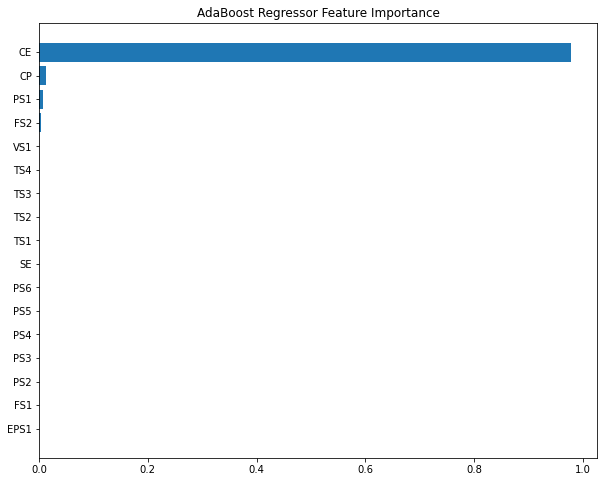

In [87]:
plt.figure(figsize = (10,8))
feature_imp = ada.feature_importances_
f_importances(feature_imp,features_names)

### XGB

In [98]:
from xgboost import XGBRegressor 

xgb = XGBRegressor(random_state=42)
xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=16, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [102]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgb,x_train,y_train,scoring='neg_mean_squared_error',cv=10)
RMSE_xgb = np.sqrt(-scores)
RMSE_xgb.mean()

1.03039537335381

In [100]:
#featrue importance 
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.title('XGBoost Feature Importance')

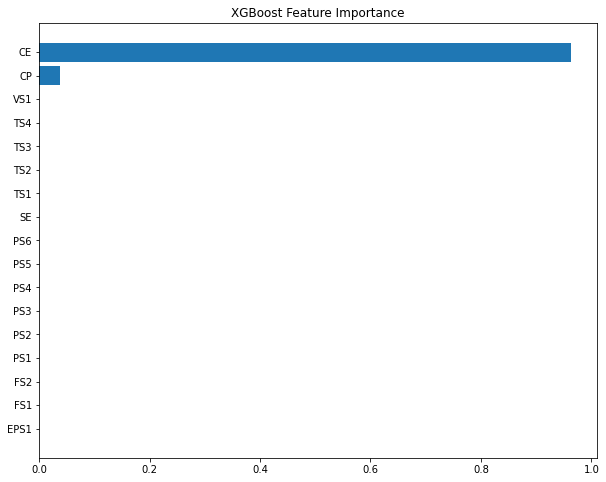

In [103]:
plt.figure(figsize = (10,8))
feature_imp = xgb.feature_importances_
f_importances(feature_imp,features_names)

### LGBM

In [94]:
from lightgbm import LGBMRegressor
lgb = LGBMRegressor(random_state=42)
lgb.fit(x_train,y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [97]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lgb,x_train,y_train,scoring='neg_mean_squared_error',cv=10)
RMSE_lgb = np.sqrt(-scores)
RMSE_lgb.mean()

1.6976891902052014

In [95]:
#featrue importance 
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.title('LGBM Feature Importance')

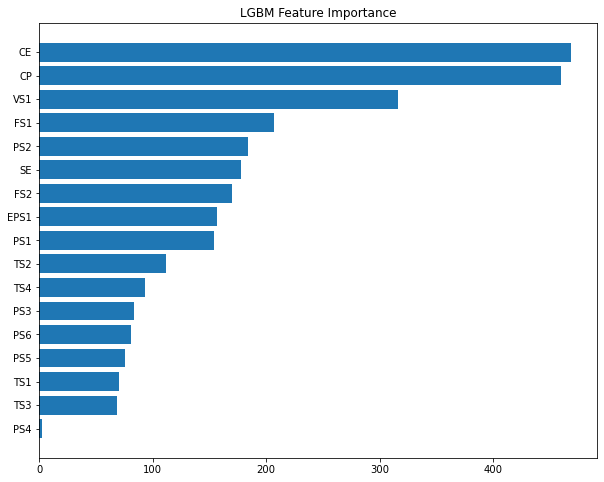

In [96]:
plt.figure(figsize = (10,8))
feature_imp = lgb.feature_importances_
f_importances(feature_imp,features_names)

### AutoML

In [35]:
from pycaret.regression import *

In [36]:
#표준화 데이터
clf = setup(data=train_minmax, target='cooler_eff')

,Description,Value
0,session_id,6028
1,Target,cooler_eff
2,Original Data,"(1382, 18)"
3,Missing Values,False
4,Numeric Features,17
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(967, 12)"


In [37]:
best5_minmax = compare_models(sort='RMSE', n_select=5, exclude=['lightgbm'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dt,Decision Tree Regressor,0.1010,9.8010,0.9900,0.9947,0.0000,0.0337,0.2540
ada,AdaBoost Regressor,0.1010,9.8010,0.9900,0.9947,0.0000,0.0337,0.0030
gbr,Gradient Boosting Regressor,0.1023,9.8008,0.9926,0.9947,0.0000,0.0339,0.0180
et,Extra Trees Regressor,0.1181,6.0587,1.0615,0.9967,0.0000,0.0309,0.0170
xgboost,Extreme Gradient Boosting,0.1186,10.0990,1.1626,0.9946,0.0000,0.0395,0.0310
rf,Random Forest Regressor,0.2016,10.9491,1.5761,0.9941,0.0000,0.0527,0.1840
br,Bayesian Ridge,2.0992,12.8059,3.2740,0.9930,0.0000,0.2886,0.0030
lr,Linear Regression,2.0968,12.8192,3.2757,0.9930,0.0000,0.2885,0.2410
huber,Huber Regressor,2.0039,13.2555,3.2797,0.9927,0.0000,0.2903,0.0060
ridge,Ridge Regression,3.0732,19.1090,4.1975,0.9894,0.0000,0.3756,0.0030
